In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier, KerasRegressor
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, InputLayer, SimpleRNN, Dropout
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [31]:
feature_names = ['pkSeqID', 'stime', 'flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport',
                 'pkts', 'bytes', 'state', 'ltime', 'seq', 'dur', 'mean','stddev',
                 'smac', 'dmac', 'sum', 'min', 'max', 'soui', 'doui', 'sco', 'dco', 'spkts',
                 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'attack', 'category',
                 'subcategory']

In [32]:
df = pd.read_csv('/Users/USER/Desktop/Code/UNSW_2018_IoT_Botnet_Dataset_1.csv', names=feature_names, delimiter=',', low_memory=False)
df.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal


In [33]:
df_half = df.sample(frac=0.125, random_state=100)
print(df_half.shape)
print(df_half.isnull().sum())

(125000, 35)
pkSeqID             0
stime               0
flgs                0
proto               0
saddr               0
sport              59
daddr               0
dport              59
pkts                0
bytes               0
state               0
ltime               0
seq                 0
dur                 0
mean                0
stddev              0
smac           125000
dmac           125000
sum                 0
min                 0
max                 0
soui           125000
doui           125000
sco            125000
dco            125000
spkts               0
dpkts               0
sbytes              0
dbytes              0
rate                0
srate               0
drate               0
attack              0
category            0
subcategory         0
dtype: int64


In [34]:
#Drop columnas
drop = ['smac', 'dmac', 'soui', 'doui', 'sco','dco']
df_drop = df_half.drop(columns=drop)

#DF after drop
print(df_drop.isnull().sum())

pkSeqID         0
stime           0
flgs            0
proto           0
saddr           0
sport          59
daddr           0
dport          59
pkts            0
bytes           0
state           0
ltime           0
seq             0
dur             0
mean            0
stddev          0
sum             0
min             0
max             0
spkts           0
dpkts           0
sbytes          0
dbytes          0
rate            0
srate           0
drate           0
attack          0
category        0
subcategory     0
dtype: int64


In [35]:
#Drop filas
df_drop2 = df_drop.dropna()

#DF after drop
print(df_drop2.shape)

(124941, 29)


In [36]:
print(df_drop2['attack'].value_counts())

attack
1    124735
0       206
Name: count, dtype: int64


In [37]:
variables_selec = ['proto', 'sbytes', 'dbytes', 'flgs', 'pkts', 'attack']
df_drop3 = df_drop2[variables_selec]
df_drop3.head()
df_drop3.shape

(124941, 6)

In [38]:
#Columnas
colums = ['proto', 'flgs']
one_hot = pd.get_dummies(df_drop3[colums])
df_encoded = pd.concat([df_drop3.drop(colums, axis=1), one_hot], axis=1)
df_encoded.head()

,sbytes,dbytes,pkts,attack,proto_icmp,proto_ipv6-icmp,proto_tcp,proto_udp,flgs_e,flgs_e F,flgs_e t,flgs_e &,flgs_e d,flgs_e g,flgs_e s,flgs_eU
617759,60,60,2,1,False,False,True,False,True,False,False,False,False,False,False,False
693227,60,60,2,1,False,False,True,False,True,False,False,False,False,False,False,False
906065,60,60,2,1,False,False,True,False,True,False,False,False,False,False,False,False
828507,60,60,2,1,False,False,True,False,True,False,False,False,False,False,False,False
869730,60,60,2,1,False,False,True,False,True,False,False,False,False,False,False,False


In [39]:
#Convertir las columnas booleanas
df_encoded = df_encoded.astype(int)
df_encoded.head()

,sbytes,dbytes,pkts,attack,proto_icmp,proto_ipv6-icmp,proto_tcp,proto_udp,flgs_e,flgs_e F,flgs_e t,flgs_e &,flgs_e d,flgs_e g,flgs_e s,flgs_eU
617759,60,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0
693227,60,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0
906065,60,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0
828507,60,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0
869730,60,60,2,1,0,0,1,0,1,0,0,0,0,0,0,0


In [40]:
#Separar las características
X = df_encoded.drop('attack', axis=1)
y = df_encoded['attack']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (87458, 15)
Tamaño del conjunto de prueba: (37483, 15)


In [41]:
#Inicializar SMOTE
smote = SMOTE(random_state=100)

#Aplicar SMOTE solo al conjunto de entrenamiento
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

#Verificar la distribución de clases después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:", y_train.value_counts())
print("Distribución de clases después de SMOTE:", y_train_resampled.value_counts())

Distribución de clases antes de SMOTE: attack
1    87323
0      135
Name: count, dtype: int64
Distribución de clases después de SMOTE: attack
1    87323
0    87323
Name: count, dtype: int64


In [42]:
#Transformar los datos de entrada a formato 3D
X_train_rnn = np.expand_dims(X_train_resampled, axis=-1)
X_test_rnn = np.expand_dims(X_test_scaled, axis=-1)

def create_rnn_model(units=50, dropout_rate=0.2, learning_rate=0.001, **kwargs):
    modelRNN = Sequential()

    modelRNN.add(InputLayer(shape=(X_train_rnn.shape[1], 1)))
    
    modelRNN.add(SimpleRNN(units=units, activation='relu'))
    
    modelRNN.add(Dropout(dropout_rate))
    
    modelRNN.add(Dense(64, activation='relu'))
    modelRNN.add(Dense(1, activation='sigmoid'))

    modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return modelRNN

modelRNN = KerasClassifier(model=create_rnn_model, verbose=0)

#Definir los hiperparámetros
param_grid = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'model__learning_rate': [0.001, 0.01],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

#Configurar GridSearchCV
grid_rnn = GridSearchCV(estimator=modelRNN, param_grid=param_grid, scoring='accuracy', cv=3)

grid_rnn_result = grid_rnn.fit(X_train_rnn, y_train_resampled)

#Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_rnn_result.best_params_}")
print(f"Mejor exactitud en validación: {grid_rnn_result.best_score_}")

y_pred_rnn = (grid_rnn_result.best_estimator_.predict(X_test_rnn) > 0.5).astype("int32")

#Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_rnn))
print("Precision: ", precision_score(y_test, y_pred_rnn))
print("Recall: ", recall_score(y_test, y_pred_rnn))
print("F1-score: ", f1_score(y_test, y_pred_rnn))

Mejores hiperparámetros: {'batch_size': 64, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__units': 50}
Mejor exactitud en validación: 0.9852100355855272
Accuracy:  0.9884214177093615
Precision:  0.9999188838416613
Recall:  0.988479632203571
F1-score:  0.9941663530297328


In [43]:
#Transformar los datos de entrada a formato 3D
X_train_cnn = np.expand_dims(X_train_resampled, axis=-1)
X_test_cnn = np.expand_dims(X_test_scaled, axis=-1)

def create_cnn_model(filters=32, kernel_size=3, dropout_rate=0.2, learning_rate=0.001, **kwargs):
    modelCNN = Sequential()

    modelCNN.add(InputLayer(shape=(X_train_cnn.shape[1], 1)))

    modelCNN.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    
    modelCNN.add(MaxPooling1D(pool_size=2))

    modelCNN.add(Dropout(dropout_rate))

    modelCNN.add(Flatten())

    modelCNN.add(Dense(64, activation='relu'))
    modelCNN.add(Dense(1, activation='sigmoid'))

    modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return modelCNN

modelCNN = KerasClassifier(model=create_cnn_model, verbose=0)

#Definir los hiperparámetros
param_grid = {
    'model__filters': [32, 64],
    'model__kernel_size': [3, 5],
    'model__dropout_rate': [0.2, 0.3],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

#Configurar GridSearchCV
grid_cnn = GridSearchCV(estimator=modelCNN, param_grid=param_grid, scoring='accuracy', cv=3)

#Ajustar el modelo
grid_cnn_result = grid_cnn.fit(X_train_cnn, y_train_resampled)

#Imprimir los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_cnn_result.best_params_}")
print(f"Mejor exactitud en validación: {grid_cnn_result.best_score_}")

y_pred_cnn = (grid_cnn_result.best_estimator_.predict(X_test_cnn) > 0.5).astype("int32")

#Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_cnn))
print("Precision: ", precision_score(y_test, y_pred_cnn))
print("Recall: ", recall_score(y_test, y_pred_cnn))
print("F1-score: ", f1_score(y_test, y_pred_cnn))

Mejores hiperparámetros: {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__filters': 64, 'model__kernel_size': 5}
Mejor exactitud en validación: 0.9938561424313063
Accuracy:  0.9896219619560868
Precision:  0.9998109998109999
Recall:  0.9897893723938843
F1-score:  0.9947749466077449


In [44]:
#LSTM
#Transformar los datos de entrada a formato 3D
X_train_lstm = np.expand_dims(X_train_resampled, axis=-1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=-1)

def create_lstm_model(units=50, dropout_rate=0.2, learning_rate=0.001, **kwargs):
    modelLSTM = Sequential()

    modelLSTM.add(InputLayer(shape=(X_train_lstm.shape[1], 1)))

    modelLSTM.add(LSTM(units=units, activation='tanh', recurrent_activation='sigmoid'))

    modelLSTM.add(Dropout(dropout_rate))

    modelLSTM.add(Dense(64, activation='relu'))
    modelLSTM.add(Dense(1, activation='sigmoid'))

    modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return modelLSTM

modelLSTM = KerasClassifier(model=create_lstm_model, verbose=0)

#Definir los hiperparámetros
param_grid = {
    'model__units': [50, 100],
    'model__dropout_rate': [0.2, 0.3],
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

#Configurar GridSearchCV
grid_lstm = GridSearchCV(estimator=modelLSTM, param_grid=param_grid, scoring='accuracy', cv=3)

#Ajustar el modelo
grid_lstm_result = grid_lstm.fit(X_train_lstm, y_train_resampled)

#Imprimir los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {grid_lstm_result.best_params_}")
print(f"Mejor exactitud en validación: {grid_lstm_result.best_score_}")

y_pred_lstm = (grid_lstm_result.best_estimator_.predict(X_test_lstm) > 0.5).astype("int32")

#Evaluar el modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_lstm))
print("Precision: ", precision_score(y_test, y_pred_lstm))
print("Recall: ", recall_score(y_test, y_pred_lstm))
print("F1-score: ", f1_score(y_test, y_pred_lstm))

Mejores hiperparámetros: {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__units': 50}
Mejor exactitud en validación: 0.9754473946447669
Accuracy:  0.989488568150895
Precision:  0.9998379692141507
Recall:  0.9896289960440501
F1-score:  0.9947072888960533


RESULTADOS FINALES

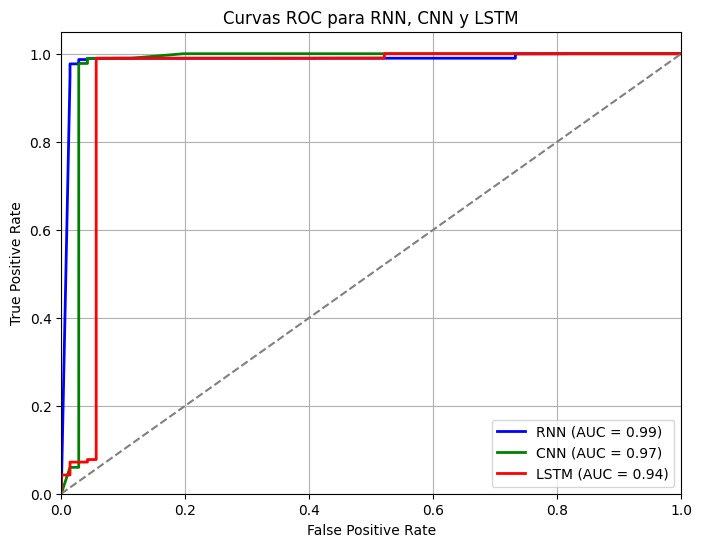

In [45]:
#Para RNN
y_pred_proba_rnn = grid_rnn.best_estimator_.predict_proba(X_test_rnn)[:, 1]

#Para CNN
y_pred_proba_cnn = grid_cnn.best_estimator_.predict_proba(X_test_cnn)[:, 1]

#Para LSTM
y_pred_proba_lstm = grid_lstm.best_estimator_.predict_proba(X_test_lstm)[:, 1]

#Calcular la curva ROC y el AUC para cada modelo
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_proba_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_proba_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

#Graficar las curvas ROC de los tres modelos
plt.figure(figsize=(8, 6))
plt.plot(fpr_rnn, tpr_rnn, color='blue', lw=2, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='green', lw=2, label=f'CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='red', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')

#Diagonal en la gráfica para referencia (clasificación aleatoria)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

#Configurar los ejes y el título
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para RNN, CNN y LSTM')
plt.legend(loc="lower right")
plt.grid()

#Mostrar la gráfica
plt.show()

In [48]:
#Calcular las métricas adicionales
y_pred_rnn = (y_pred_proba_rnn > 0.5).astype("int32")
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype("int32")
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype("int32")

#Métricas para RNN
print("Métricas RNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rnn)}")
print(f"Precision: {precision_score(y_test, y_pred_rnn)}")
print(f"Recall: {recall_score(y_test, y_pred_rnn)}")
print(f"F1-score: {f1_score(y_test, y_pred_rnn)}")

#Métricas para CNN
print("\nMétricas CNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cnn)}")
print(f"Precision: {precision_score(y_test, y_pred_cnn)}")
print(f"Recall: {recall_score(y_test, y_pred_cnn)}")
print(f"F1-score: {f1_score(y_test, y_pred_cnn)}")

#Métricas para LSTM
print("\nMétricas LSTM")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm)}")
print(f"Precision: {precision_score(y_test, y_pred_lstm)}")
print(f"Recall: {recall_score(y_test, y_pred_lstm)}")
print(f"F1-score: {f1_score(y_test, y_pred_lstm)}")

Métricas RNN
Accuracy: 0.9884214177093615
Precision: 0.9999188838416613
Recall: 0.988479632203571
F1-score: 0.9941663530297328

Métricas CNN
Accuracy: 0.9896219619560868
Precision: 0.9998109998109999
Recall: 0.9897893723938843
F1-score: 0.9947749466077449

Métricas LSTM
Accuracy: 0.989488568150895
Precision: 0.9998379692141507
Recall: 0.9896289960440501
F1-score: 0.9947072888960533


Epoch 1/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9907 - loss: 0.0421 - val_accuracy: 0.9878 - val_loss: 0.1015
Epoch 2/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9915 - loss: 0.0380 - val_accuracy: 0.9878 - val_loss: 0.0522
Epoch 3/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9923 - loss: 0.0358 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 4/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9897 - loss: 0.0425 - val_accuracy: 0.9878 - val_loss: 0.0526
Epoch 5/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9920 - loss: 0.0382 - val_accuracy: 0.9877 - val_loss: 0.0536
Epoch 6/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9920 - loss: 0.0369 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 7/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9927 - loss: 0.0350 - val_accuracy: 0.9868 - val_loss: 0.0585
Epoch 8/20
5458/5458 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9935 - loss: 0.0319 - 

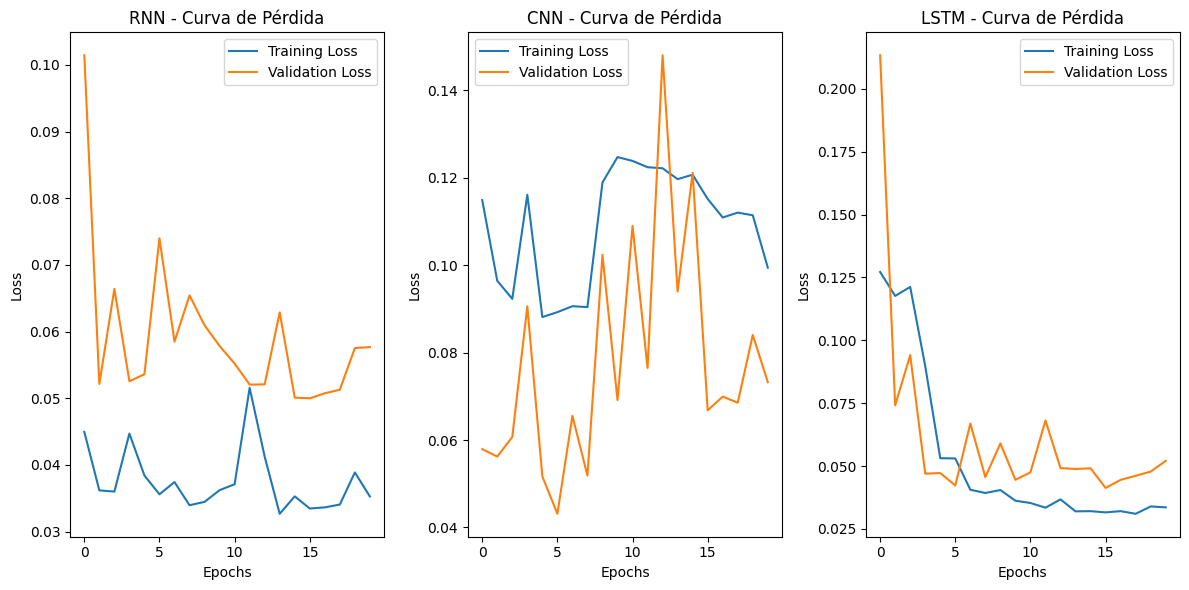

In [52]:
#Ajustar el modelo RNN con más épocas
history_rnn = grid_rnn_result.best_estimator_.model_.fit(X_train_rnn, y_train_resampled, 
                                                        validation_data=(X_test_rnn, y_test), 
                                                        epochs=20)

#Ajustar el modelo CNN con más épocas
history_cnn = grid_cnn_result.best_estimator_.model_.fit(X_train_cnn, y_train_resampled, 
                                                        validation_data=(X_test_cnn, y_test), 
                                                        epochs=20)

#Ajustar el modelo LSTM con más épocas
history_lstm = grid_lstm_result.best_estimator_.model_.fit(X_train_lstm, y_train_resampled, 
                                                          validation_data=(X_test_lstm, y_test), 
                                                          epochs=20)


#Graficar las curvas de aprendizaje (pérdida y precisión)
plt.figure(figsize=(12, 6))

#RNN
plt.subplot(1, 3, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#CNN
plt.subplot(1, 3, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#LSTM
plt.subplot(1, 3, 3)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

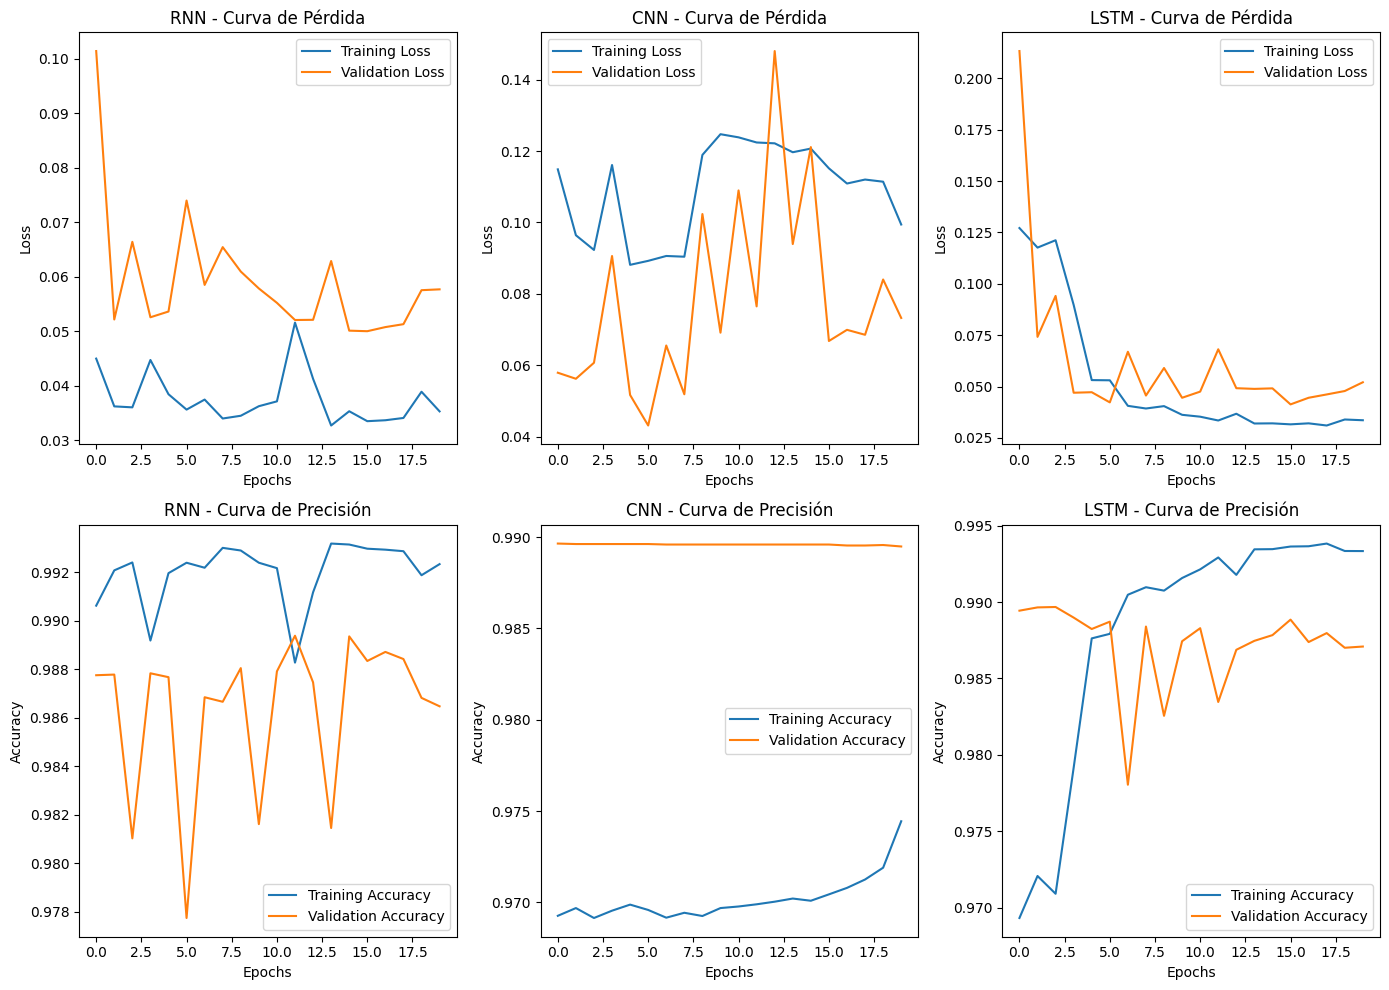

In [54]:
#Graficar las curvas de aprendizaje (pérdida y precisión)
plt.figure(figsize=(14, 10))

#Subplot 1: RNN - Curva de Pérdida
plt.subplot(2, 3, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Subplot 2: CNN - Curva de Pérdida
plt.subplot(2, 3, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Subplot 3: LSTM - Curva de Pérdida
plt.subplot(2, 3, 3)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM - Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Subplot 4: RNN - Curva de Precisión
plt.subplot(2, 3, 4)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN - Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Subplot 5: CNN - Curva de Precisión
plt.subplot(2, 3, 5)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN - Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Subplot 6: LSTM - Curva de Precisión
plt.subplot(2, 3, 6)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM - Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Ajustar el diseño para que no se solapen
plt.tight_layout()
plt.show()


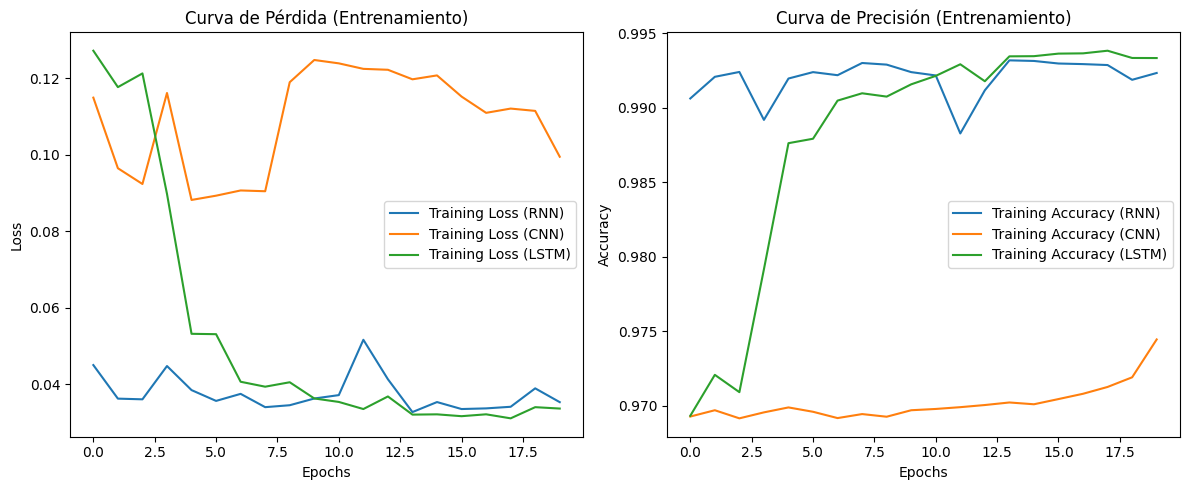

In [55]:
plt.figure(figsize=(12, 5))

#Subplot 1: Curva de Pérdida (solo entrenamiento)
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss (RNN)')
plt.plot(history_cnn.history['loss'], label='Training Loss (CNN)')
plt.plot(history_lstm.history['loss'], label='Training Loss (LSTM)')
plt.title('Curva de Pérdida (Entrenamiento)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Subplot 2: Curva de Precisión (solo entrenamiento)
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy (RNN)')
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy (CNN)')
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy (LSTM)')
plt.title('Curva de Precisión (Entrenamiento)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
